# Introduction to OMMX

Open Mathematical prograMming eXchange

This notebook is designed for using as a slide with [jupyterlab-contrib/rise](https://github.com/jupyterlab-contrib/rise). Please install it if you want to reproduce slides.

## Mathematical Programming for Data Scientist

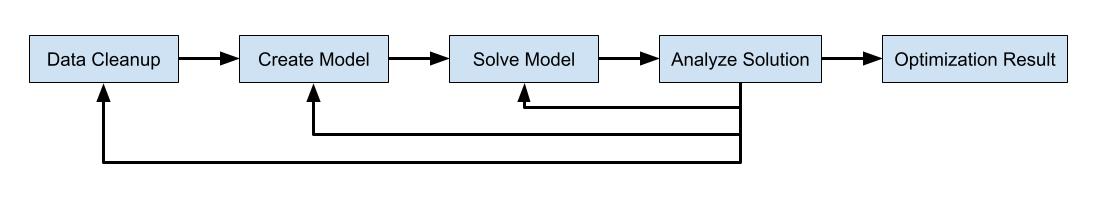

- Create optimization problem from user's data
  - Preprocess data using `pandas`, visualizing by `matplotlib`, ...
  - Modeling by `Python-MIP`, `JuMP`, ...
- Solve optimization problem by problem-specific solvers
  - Several problem class, e.g. Linear Programming (LP), Mixed-Integer Programming (MIP), Quadratic Programming (QP), ...
  - Exact solvers, e.g. Branch-and-Bound (BnB), ...
    - `CBC`, `Gurobi`, ...
  - (Meta-) Heuristic algorithm, e.g. Simulated Annealing (SA), Local search, ...
    - `Digital Annealer`, `Fixstars Amplify`, `OpenJij`,...
  - **No best solvers**, strongly depends on the problem itself, and how modeling.

We need many softwares!

## Exchange models and solutions

- We need common data format for orchestraining

In [1]:
print("hi")

hi
